In [1]:
import os
import csv
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import gmaps
from math import sin, cos, sqrt, atan2, radians, asin
import math
from haversine import haversine

#INVENTORY = read. Select ONLY those with areaType = neighborhood.
file_inventory = "rentals/rentalInventory_All.csv"
file_price = "rentals/medianAskingRent_All.csv"
# Now, read the data into a DataFrame
file_df = pd.read_csv(file_inventory, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
file1 = file_df.loc[file_df["areaType"]=="neighborhood"] #select only neighborhood
file1.dtypes

#PRICE = read. Select ONLY those with areaType = neighborhood.
file_df_price = pd.read_csv(file_price, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
file2 = file_df_price.loc[file_df_price["areaType"]=="neighborhood"] #select only neighborhood
file2.dtypes


#INVENTORY: dataframe. Convert all to numbers
cols = file1.columns.drop(['Borough',"areaName","areaType"])
file1[cols] = file1[cols].apply(pd.to_numeric, errors='coerce')
file1.head()

#PRICE: dataframe. Convert all to numbers
cols_price = file2.columns.drop(['Borough',"areaName","areaType"])
file2[cols_price] = file2[cols_price].apply(pd.to_numeric, errors='coerce')
file2.head()

/Users/mzamudio/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
5,Alley Park,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Astoria,Queens,neighborhood,1600.0,1650.0,1620.0,1600.0,1700.0,1700.0,1600.0,...,2150.0,2111.0,2100.0,2100.0,2200.0,2200.0,2215.0,2250.0,2250.0,2200.0
7,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2300.0,2095.0,2095.0,1850.0,2095.0,2095.0,2000.0,1895.0,1945.0
8,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1800.0,1950.0,1999.0,2000.0,2000.0,1850.0,1700.0,1675.0,1675.0,1750.0
9,Battery Park City,Manhattan,neighborhood,3495.0,3346.0,3268.0,3295.0,3100.0,3395.0,3200.0,...,4200.0,4100.0,4050.0,4290.0,4650.0,4525.0,4795.0,4900.0,5016.0,4900.0


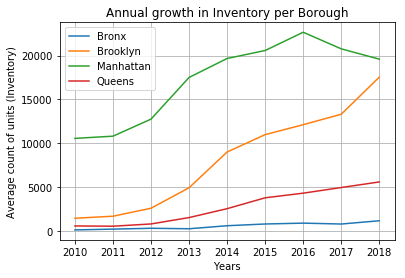

In [2]:
#INVENTORY
#building dataframe for the inventory
grouped_table = file1.groupby(["Borough"])
ten_sum = grouped_table["2010-10"].sum()
eleven_sum = grouped_table["2011-10"].sum()
twelve_sum = grouped_table["2012-10"].sum()
thirteen_sum = grouped_table["2013-10"].sum()
fourteen_sum = grouped_table["2014-10"].sum()
fifteen_sum = grouped_table["2015-10"].sum()
sixteen_sum = grouped_table["2016-10"].sum()
seventeen_sum = grouped_table["2017-10"].sum()
eighteen_sum = grouped_table["2018-10"].sum()
summary_purchasing_analysis = pd.DataFrame({"2010": ten_sum,"2011":eleven_sum, "2012":twelve_sum,
                                           "2013":thirteen_sum, "2014":fourteen_sum, "2015":fifteen_sum,
                                           "2016":sixteen_sum,"2017":seventeen_sum, "2018":eighteen_sum})
summary_purchasing_analysis
transposed_df =summary_purchasing_analysis.T

#Create additional features in the plot
plt.plot(transposed_df)
plt.title("Annual growth in Inventory per Borough")
plt.xlabel('Years')
plt.ylabel("Average count of units (Inventory)")
plt.legend(transposed_df,loc='upper left')
plt.grid()

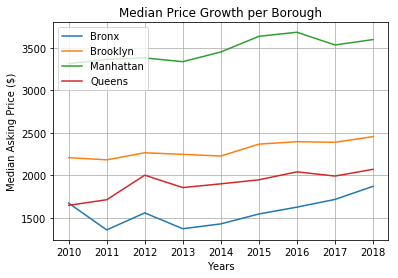

In [3]:
#PRICE
#building dataframe for the Median Price
grouped_table_price = file2.groupby(["Borough"])
ten_mean = grouped_table_price["2010-10"].mean()
eleven_mean = grouped_table_price["2011-10"].mean()
twelve_mean = grouped_table_price["2012-10"].mean()
thirteen_mean = grouped_table_price["2013-10"].mean()
fourteen_mean = grouped_table_price["2014-10"].mean()
fifteen_mean = grouped_table_price["2015-10"].mean()
sixteen_mean = grouped_table_price["2016-10"].mean()
seventeen_mean = grouped_table_price["2017-10"].mean()
eighteen_mean = grouped_table_price["2018-10"].mean()
summary_purchasing_analysis_price = pd.DataFrame({"2010": ten_mean,"2011":eleven_mean, "2012":twelve_mean,
                                           "2013":thirteen_mean, "2014":fourteen_mean, "2015":fifteen_mean,
                                           "2016":sixteen_mean,"2017":seventeen_mean, "2018":eighteen_mean})
summary_purchasing_analysis_price
transposed_df =summary_purchasing_analysis_price.T

#Create additional features in the plot
plt.plot(transposed_df)
plt.title("Median Price Growth per Borough")
plt.xlabel('Years')
plt.ylabel("Median Asking Price ($)")
plt.legend(transposed_df,loc='upper left')
plt.grid()


In [4]:
#merged both dataframes INVENTORY and PRICE
merged_table = pd.merge(file1, file2, on="areaName", how="left")
merged_table_selected_col = merged_table[["areaName","Borough_x","areaType_x","2018-10_x","2018-10_y"]]
renamed_table = merged_table_selected_col.rename(columns={"areaName": "Area Name",
                                                          "Borough_x": "Borough",
                                                           "areaType_x":"Area Type",
                                                          "2018-10_x": "2018 Units",
                                                          "2018-10_y": "2018 Price"})

renamed_table.head()
dropped = renamed_table.dropna(0)
dropped_2 = dropped.iloc[5:]

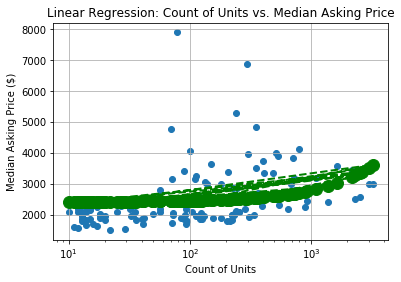

In [5]:
#Linear Regression
#Question: Does saturated markets (more units) have better or higher prices?
count_units = dropped_2["2018 Units"]
median_price = dropped_2["2018 Price"]
(slope, intercept, _, _, _) = linregress(count_units, median_price) 
approx_weights = slope * count_units + intercept
approx_weights
# Plot data
plt.scatter(count_units, median_price)
plt.plot(count_units,approx_weights,'b--',color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xscale("log")
plt.title("Linear Regression: Count of Units vs. Median Asking Price")
plt.xlabel('Count of Units')
plt.ylabel("Median Asking Price ($)")
plt.grid()
plt.show()


In [6]:
#In order to get the lat and longitude of the streeteasy data, I decided to extract an approx. lat and lng from the airbnb file.
#pull the airbnb file
file_airbnbn = "rentals/AIRBNB_Listings.csv"
# Now, read the data into a DataFrame
file_abb = pd.read_csv(file_airbnbn, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
file_abb.head()
renamed_abb = file_abb.rename(columns={"neighbourhood": "Area Name","neighbourhood_group": "Borough"})
selected_abb= renamed_abb[["Area Name","Borough","latitude","longitude","price"]]

sorted_Abb = selected_abb.sort_values("price",ascending=False).drop_duplicates(["Area Name"])
sorted_Abb.head(5)

,Area Name,Borough,latitude,longitude,price
7339,East Harlem,Manhattan,40.79264477441468,-73.93897607138179,9999
7673,Flatbush,Brooklyn,40.64078826768151,-73.96720142282041,9999
13930,Lower East Side,Manhattan,40.713553556333174,-73.98506922547853,9999
11854,Clinton Hill,Brooklyn,40.69241885553613,-73.96827744812697,999
21065,Chelsea,Manhattan,40.74775263785767,-73.99166898509529,999


In [7]:
#merged streeteasy and airbnb data to get lat and lng included
#NOTE: Airbnb file has many lats and lng per neighborhood, I have taken the first one to appear and dedup the rest.
merged_abb_price = pd.merge(dropped_2, sorted_Abb, on="Area Name", how="left")
dropped_abb_price = merged_abb_price.dropna(0)
renamed_abb_price = dropped_abb_price.rename(columns={"Borough_x": "Borough","price": "AirBnB price"})
selected_abb_price = renamed_abb_price[["Borough","Area Name", "Area Type","latitude","longitude","2018 Units","2018 Price","AirBnB price"]]
#selected_abb_price.head()
cols_2 = selected_abb_price.columns.drop(['Borough',"Area Name","Area Type"])
selected_abb_price[cols_2] = selected_abb_price[cols_2].apply(pd.to_numeric, errors='coerce')
selected_abb_price.head()


,Borough,Area Name,Area Type,latitude,longitude,2018 Units,2018 Price,AirBnB price
0,Queens,Bayside,neighborhood,40.775592,-73.773822,27,2400.0,99
2,Brooklyn,Bedford-Stuyvesant,neighborhood,40.688599,-73.959058,2325,2500.0,99
3,Bronx,Belmont,neighborhood,40.853998,-73.885273,35,2100.0,78
4,Brooklyn,Bensonhurst,neighborhood,40.611260,-73.980744,121,1850.0,99
5,Brooklyn,Bergen Beach,neighborhood,40.622986,-73.905006,14,2088.0,97


In [8]:
#Map hottest markets (price) based on streeteasy data (lats and lng from airbnb merged date)
gmaps.configure(api_key="xxx") #during the test I used my key

locations = selected_abb_price[["latitude", "longitude"]]
median_price = selected_abb_price["2018 Units"]
fig = gmaps.figure(map_type = 'HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations,weights =median_price,point_radius = 29))
fig#Display figure

Figure(layout=FigureLayout(height='420px'))

In [9]:
#Map hottest markets (price) based on streeteasy data (lats and lng from airbnb merged date)
gmaps.configure(api_key="xx") #during the test I used my key

locations = selected_abb_price[["latitude", "longitude"]]
median_price = selected_abb_price["2018 Price"]
fig = gmaps.figure(map_type = 'HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations,weights =median_price,point_radius = 27))
fig#Display figure

Figure(layout=FigureLayout(height='420px'))

In [25]:
#Map hottest markets (price) based on airbnb data (lats and lng from airbnb merged date)
gmaps.configure(api_key ="xx") #during the test I used my key

locations = sorted_Abb[["latitude", "longitude"]]
median_price = sorted_Abb["price"]
fig = gmaps.figure(map_type = 'HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations,weights =median_price,point_radius = 27))
fig#Display figure

Figure(layout=FigureLayout(height='420px'))

In [12]:
#PRICE: The highest Median Price per Neighborhood in NY
selected_abb_price.sort_values('2018 Price', ascending=False).head(5)

,Borough,Area Name,Area Type,latitude,longitude,2018 Units,2018 Price,AirBnB price
110,Manhattan,Tribeca,neighborhood,40.719417,-74.009970,296,6860.0,99
28,Brooklyn,DUMBO,neighborhood,40.703114,-73.988533,70,4773.0,74
19,Manhattan,Chelsea,neighborhood,40.747753,-73.991669,804,4137.0,999
73,Manhattan,Midtown,neighborhood,40.753734,-73.972717,512,4000.0,999
117,Manhattan,West Village,neighborhood,40.735569,-74.000067,532,3900.0,995


In [13]:
#INVENTORY: The most # of untis per Neighborhood in NY
selected_abb_price.sort_values('2018 Units', ascending=True).head()

,Borough,Area Name,Area Type,latitude,longitude,2018 Units,2018 Price,AirBnB price
65,Bronx,Longwood,neighborhood,40.819800,-73.903415,10,2088.0,99
79,Bronx,Morris Heights,neighborhood,40.845651,-73.916842,11,1595.0,80
72,Queens,Middle Village,neighborhood,40.713472,-73.881993,12,2200.0,99
87,Queens,Ozone Park,neighborhood,40.679239,-73.847714,12,1563.0,99
96,Queens,Richmond Hill,neighborhood,40.688214,-73.834111,13,1850.0,95


In [14]:
selected_abb_price
bryant_park = 40.755603, -73.984931
for i, row in selected_abb_price.iterrows():
    coord = row.loc[['latitude','longitude']]
    n = row.loc['Area Name']
    distance = haversine(bryant_park, coord)
    selected_abb_price.loc[selected_abb_price['Area Name'] == n, 'distance (km)'] = distance

In [15]:
selected_abb_price['distance (miles)']=selected_abb_price['distance (km)']*0.62
selected_abb_price.head()

,Borough,Area Name,Area Type,latitude,longitude,2018 Units,2018 Price,AirBnB price,distance (km),distance (miles)
0,Queens,Bayside,neighborhood,40.775592,-73.773822,27,2400.0,99,17.917532,11.108870
2,Brooklyn,Bedford-Stuyvesant,neighborhood,40.688599,-73.959058,2325,2500.0,99,7.763053,4.813093
3,Bronx,Belmont,neighborhood,40.853998,-73.885273,35,2100.0,78,13.786477,8.547616
4,Brooklyn,Bensonhurst,neighborhood,40.611260,-73.980744,121,1850.0,99,16.054159,9.953578
5,Brooklyn,Bergen Beach,neighborhood,40.622986,-73.905006,14,2088.0,97,16.213165,10.052162


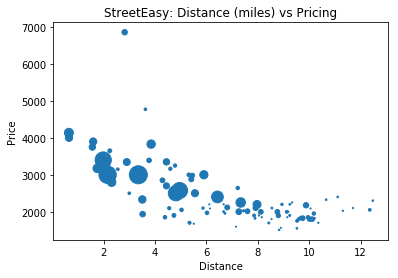

In [16]:
plt.scatter(selected_abb_price['distance (miles)'],selected_abb_price['2018 Price'],s=selected_abb_price['2018 Units']/10)
plt.grid()
#Create additional features in the plot
plt.title("StreetEasy: Distance (miles) vs Pricing")
plt.xlabel('Distance')
plt.ylabel("Price")
#plt.legend(selected_abb_price,loc='upper left')
plt.grid()

In [17]:
units_borough = selected_abb_price.groupby(["Borough"])
count_units_borough = units_borough["2018 Units"].sum()
summary_units = pd.DataFrame({"count_units": count_units_borough})

summary_units

,count_units
Borough,
Bronx,1022
Brooklyn,15601
Manhattan,12669
Queens,3419


In [18]:
file_311 = "rentals/Merged3112018Data.csv"
# Now, read the data into a DataFrame
file_df_311 = pd.read_csv(file_311, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
file_df_311_grouped = file_df_311.groupby(["Borough"])
count_311_bx = file_df_311_grouped["Complaint Type"].count()["BRONX"]
count_311_mh = file_df_311_grouped["Complaint Type"].count()["MANHATTAN"]
count_311_qs = file_df_311_grouped["Complaint Type"].count()["QUEENS"]
count_311_bk = file_df_311_grouped["Complaint Type"].count()["BROOKLYN"]
count_311_si = file_df_311_grouped["Complaint Type"].count()["STATEN ISLAND"]

summary_311_borough = pd.DataFrame({"Borough":["Bronx","Manhattan","Queens","Brooklyn","Staten island"],
                                    "Count of complaints":[count_311_bx,count_311_mh,count_311_qs,count_311_bk,count_311_si]})

summary_311_borough


,Borough,Count of complaints
0,Bronx,124
1,Manhattan,298
2,Queens,184
3,Brooklyn,173
4,Staten island,35


In [19]:
merged_table = pd.merge(summary_units, summary_311_borough, on="Borough", how="left")
merged_table["Average complaints"] = merged_table["Count of complaints"]/merged_table["count_units"]*100
merged_table

,Borough,count_units,Count of complaints,Average complaints
0,Bronx,1022,124,12.133072
1,Brooklyn,15601,173,1.108903
2,Manhattan,12669,298,2.352198
3,Queens,3419,184,5.381691


In [20]:
cols_ABNB = sorted_Abb.columns.drop(['Borough',"Area Name"])
sorted_Abb[cols_ABNB] = sorted_Abb[cols_ABNB].apply(pd.to_numeric, errors='coerce')
sorted_Abb.head()

,Area Name,Borough,latitude,longitude,price
7339,East Harlem,Manhattan,40.792645,-73.938976,9999
7673,Flatbush,Brooklyn,40.640788,-73.967201,9999
13930,Lower East Side,Manhattan,40.713554,-73.985069,9999
11854,Clinton Hill,Brooklyn,40.692419,-73.968277,999
21065,Chelsea,Manhattan,40.747753,-73.991669,999


In [21]:
sorted_Abb['price'] = sorted_Abb['price'].astype(np.int64)
sorted_Abb['price'].dtype

sorted_Abb.loc[sorted_Abb["Area Name"]=="Midtown"]
sorted_Abb=sorted_Abb.loc[sorted_Abb["price"]<1000]
sorted_Abb.head()

,Area Name,Borough,latitude,longitude,price
11854,Clinton Hill,Brooklyn,40.692419,-73.968277,999
21065,Chelsea,Manhattan,40.747753,-73.991669,999
44362,Hell's Kitchen,Manhattan,40.754938,-73.995832,999
23847,Midtown,Manhattan,40.753734,-73.972717,999
17116,Greenwich Village,Manhattan,40.734256,-73.994759,999


In [22]:
#distance graph for airbnb listing
sorted_Abb
bryant_park = 40.755603, -73.984931
for i, row in sorted_Abb.iterrows():
    coord = row.loc[['latitude','longitude']]
    n = row.loc['Area Name']
    distance = haversine(bryant_park, coord)
    sorted_Abb.loc[sorted_Abb['Area Name'] == n, 'distance (km)'] = distance
    
sorted_Abb['distance (miles)']=sorted_Abb['distance (km)']*0.62
sorted_Abb.head()


,Area Name,Borough,latitude,longitude,price,distance (km),distance (miles)
11854,Clinton Hill,Brooklyn,40.692419,-73.968277,999,7.164560,4.442027
21065,Chelsea,Manhattan,40.747753,-73.991669,999,1.041218,0.645555
44362,Hell's Kitchen,Manhattan,40.754938,-73.995832,999,0.921173,0.571127
23847,Midtown,Manhattan,40.753734,-73.972717,999,1.049603,0.650754
17116,Greenwich Village,Manhattan,40.734256,-73.994759,999,2.513880,1.558605


Text(0, 0.5, 'Price')

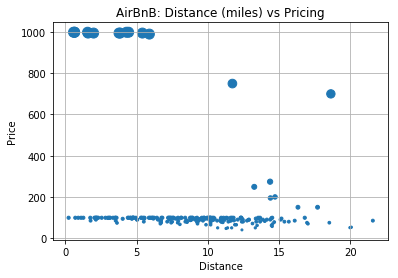

In [23]:
plt.scatter(sorted_Abb['distance (miles)'],sorted_Abb['price'],s=sorted_Abb['price']/10)
plt.grid()
#Create additional features in the plot
plt.title("AirBnB: Distance (miles) vs Pricing")
plt.xlabel('Distance')
plt.ylabel("Price")


In [24]:
#sorted_Abb.loc[sorted_Abb["Area Name"]=="Midtown"]

sorted_Abb.loc[sorted_Abb["Area Name"]=="Midtown"]

sorted_Abb.head()

,Area Name,Borough,latitude,longitude,price,distance (km),distance (miles)
11854,Clinton Hill,Brooklyn,40.692419,-73.968277,999,7.164560,4.442027
21065,Chelsea,Manhattan,40.747753,-73.991669,999,1.041218,0.645555
44362,Hell's Kitchen,Manhattan,40.754938,-73.995832,999,0.921173,0.571127
23847,Midtown,Manhattan,40.753734,-73.972717,999,1.049603,0.650754
17116,Greenwich Village,Manhattan,40.734256,-73.994759,999,2.513880,1.558605
